Google Trends provides an API that can be used to analyze the daily searches on Google. This API is known as pytrends

In [ ]:
# pip install pytrends

https://pypi.org/project/pytrends/#multirange_interest_over_time

https://github.com/pat310/google-trends-api

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pytrends.request import TrendReq


In [ ]:
# google trendsler ile nasıl analizler yapabilirim bunu araştırdım. En doğru sonucu elde etmek için
# verilerin doğruluğunu konntrol ettim. Bazı methodlar kullanışlı değildi.
#  benim için en kullanışlı method 
# trends.related_topics() ve trends.related_queries methodlarından yararlanmak oldu.
# en çok arananlar kısmı doğru çalışmıyordu bundan dolayı bu kısmı kullanabilir hale getirdim...filan yualn

In [6]:
trends= TrendReq(hl='tr-TR', tz=360)

In [34]:
kw_list = ["akp","chp","mhp","iyi parti","deva","işçi","milli ittifak","cumhur ittifak"]
timeframe = 'today 1-y'

In [87]:
trends.top_charts(2016, hl='en-US', tz=300, geo='TR')


,title,exploreQuery
0,Artık Yıl,
1,Güneş Tutulması,
2,Dünya Kadınlar Günü,
3,Ohal,
4,Saat Farkı,


ilk hedef:
son 10 yıl arama artışı gösteren-en çok aranan terimleri çek(ilk 5-10) --alt dalları belki
Bu terimlerin konularını belirle.. türkiye de en çok aranan -dikkat çeken keysler?


In [85]:
df_trends = pd.DataFrame()
for i in range(2011,2023):
    top_trends = trends.top_charts(i, hl='tr-TR', tz=300, geo='TR')
    df_trends = pd.concat([df_trends,pd.Series(top_trends["title"], name=i)], axis=1)
df_trends

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Muhteşem Yüzyıl,Facebook,GÜNEŞİ BEKLERKEN,Kiraz Mevsimi,Kiralık Aşk,Artık Yıl,Game Of Thrones,Sen Anlat Karadeniz,İstanbul Seçim Sonuçları 2019,EBA,EBA giriş,Dolar/TL
1,E Devlet,YouTube,KARADAYI,Güneşi Beklerken,Poyraz Karayel,Güneş Tutulması,Fi,Çukur,Geleceğe Nefes,Dolar Kaç TL,Squid Game,Bayram tatili kaç gün
2,Adini Feriha Koydum,e-Okul,MEDCEZİR,Kaçak Gelinler,Çilek Kokusu,Dünya Kadınlar Günü,İçerde,Ufak Tefek Cinayetler,YSK,Corona Virüsü,AÖL,ÖBA
3,Trendyol,Ösym,BİR AŞK HİKAYESİ,Kardeş Payı,Aşk Yeniden,Ohal,Kalp Atışı,Bir Zamanlar Çukurova,Deprem,Deprem,Mesut Özil,Bergen
4,Ask Tesadufleri Sever,Ekşi Sözlük,TATAR RAMAZAN,Medcezir,Güneşin Kızları,Saat Farkı,İsimsizler,Erkenci Kuş,Sigara Fiyatları,Zoom,Elmalı Davası,Kedi
5,Acunn,Araba Oyunları,BABAM SINIFTA KALDI,Ulan İstanbul,Acil Aşk Aranıyor,NaN,İstanbullu Gelin,Jet Sosyete,Dolar Kuru,HES Kodu Alma,MHRS randevu,Ukrayna
6,Wolfteam,Milliyet,ÇALIKUŞU,Güllerin Savaşı,İnadına Aşk,NaN,Siyah Beyaz Aşk,Avlu,Askerlik Son Dakika,Kandilli Rasathanesi,Okulun ilk günü,Toki başvuru
7,Incir Receli,Işkur,İŞLER GÜÇLER,Küçük Ağa,Kırgın Çiçekler,NaN,Şevket Yerimdar,NaN,EYT,Sokağa Çıkma Yasağı,Sadakatsiz,Galatasaray Barcelona
8,Defne Joy Foster,Hürriyet,FATİH HARBİYE,Kara Para Aşk,Eşkiya Dünyaya Hükümdar Olmaz,NaN,Söz,NaN,İstiklal Marşı 10 Kıta,Sağlık Bakanlığı,Sezai Karakoç,Asgari ücret
9,Aref,Habertük,BENİ BÖYLE SEV,Reaksiyon,Kara Ekmek,NaN,Stranger Things,NaN,Notre Dame Katedrali,ABD Seçimleri,HES kodu alma,Ahmet Çalık


In [ ]:
# Listeler, geçen yılla karşılaştırıldığında bu yıl en fazla artış gösteren arama terimlerine dayanır.

In [225]:
# konulara göre ayrım yapılmış şekilde sonuç dönüyor ve ilk sütunu döndüğü için kulanışlı değil.

### son 10 ylda aranan terimlerin ve konuların yıllara göre değişimi analiz et.

In [236]:
timeframe

'2016-12-312017-01-01'

In [ ]:
# rising
# Yükselen aramalar, girdiğiniz anahtar kelime ile aranan ve istenen dönemde hacmi en fazla 
# artan terimlerdir (veya hiçbir anahtar kelime girilmediyse genel aramalardır). 
# Yükselişte olan her arama terimi için, terimin önceki döneme kıyasla büyüme yüzdesini görürsünüz. 
# Yüzde yerine "Büyük Çıkış" görüyorsanız bu, arama teriminin 
# %5.000'in üzerinde bir büyüme gösterdiği anlamına gelir.

In [242]:
konular[""]["top"]

,value,formattedValue,hasData,link,topic_mid,topic_title,topic_type
0,100,100,True,/trends/explore?q=/m/0866r&date=today+5-y&geo=TR,/m/0866r,Hava Durumu,Konu
1,69,69,True,/trends/explore?q=/m/01d_1l&date=today+5-y&geo=TR,/m/01d_1l,Fiyat,Konu
2,57,57,True,/trends/explore?q=/m/07h26&date=today+5-y&geo=TR,/m/07h26,Çeviri,Konu
3,53,53,True,/trends/explore?q=/m/09jcvs&date=today+5-y&geo=TR,/m/09jcvs,YouTube,Şirket
4,47,47,True,/trends/explore?q=/m/09nqf&date=today+5-y&geo=TR,/m/09nqf,ABD Doları,Para Birimi
5,40,40,True,/trends/explore?q=/m/05jhg&date=today+5-y&geo=TR,/m/05jhg,Haber,Konu
6,39,39,True,/trends/explore?q=/m/02y1vz&date=today+5-y&geo=TR,/m/02y1vz,Facebook,Sosyal ağ
7,39,39,True,/trends/explore?q=/m/02hwyss&date=today+5-y&ge...,/m/02hwyss,Türkçe,İnsan dili
8,39,39,True,/trends/explore?q=/m/025rs2z&date=today+5-y&ge...,/m/025rs2z,Altın,Element
9,32,32,True,/trends/explore?q=/m/02vxn&date=today+5-y&geo=TR,/m/02vxn,Film,Konu


In [247]:
konular[""]["rising"]

,value,formattedValue,link,topic_mid,topic_title,topic_type
0,16050,Büyük Çıkış,/trends/explore?q=/g/11b77d3kyh&date=today+5-y...,/g/11b77d3kyh,2020,Konu
1,15550,Büyük Çıkış,/trends/explore?q=/g/11x1ngsf3&date=today+5-y&...,/g/11x1ngsf3,2019,Konu
2,14850,Büyük Çıkış,/trends/explore?q=/g/11b77qrp3l&date=today+5-y...,/g/11b77qrp3l,2022,Konu
3,12350,Büyük Çıkış,/trends/explore?q=/m/01cpyy&date=today+5-y&geo=TR,/m/01cpyy,Koronavirüs,Virüs
4,5550,Büyük Çıkış,/trends/explore?q=/g/11b77d6b6f&date=today+5-y...,/g/11b77d6b6f,2021,Konu
5,2200,+%2.200,/trends/explore?q=/m/017rf_&date=today+5-y&geo=TR,/m/017rf_,Netflix,Şirket
6,1950,+%1.950,/trends/explore?q=/g/11f555cn8l&date=today+5-y...,/g/11f555cn8l,TikTok,Konu
7,1200,+%1.200,/trends/explore?q=/m/086nh&date=today+5-y&geo=TR,/m/086nh,Web Sayfası,Konu
8,700,+%700,/trends/explore?q=/m/09nqf&date=today+5-y&geo=TR,/m/09nqf,ABD Doları,Para Birimi
9,650,+%650,/trends/explore?q=/g/11b77b4nf8&date=today+5-y...,/g/11b77b4nf8,2018,Konu


In [29]:
timeframe=f"{2016}"+"-12-31 " + f"{2018}" + "-01-01"
trends.build_payload(kw_list=[" "], cat=0, timeframe=timeframe, geo='TR')
konular = trends.related_topics()
konular

{'': {'rising':     value formattedValue                                               link  \
  0    3450        +%3.450  /trends/explore?q=/g/11b77b4nf8&date=2016-12-3...   
  1    1500        +%1.500  /trends/explore?q=/g/11b77qrp3k&date=2016-12-3...   
  2    1250        +%1.250  /trends/explore?q=/g/1211jpq0&date=2016-12-31+...   
  3     750          +%750  /trends/explore?q=/m/0czt4v&date=2016-12-31+20...   
  4     400          +%400  /trends/explore?q=/m/03k3r&date=2016-12-31+201...   
  5     300          +%300  /trends/explore?q=/g/121cxq83&date=2016-12-31+...   
  6     200          +%200  /trends/explore?q=/m/048knlz&date=2016-12-31+2...   
  7     180          +%180  /trends/explore?q=/m/03xwkf&date=2016-12-31+20...   
  8     180          +%180  /trends/explore?q=/m/02bbq&date=2016-12-31+201...   
  9     170          +%170  /trends/explore?q=/m/05fgw8&date=2016-12-31+20...   
  10    160          +%160  /trends/explore?q=/m/07klh&date=2016-12-31+201...   
  11    140   

In [27]:
trends = TrendReq(hl='tr-TR', tz=360);

In [52]:
timeframe=f"{2011-1}"+"-12-31 " + f"{2011+1}" + "-01-01"
trends.build_payload(kw_list=[" "], cat=0, timeframe=timeframe, geo='TR')
konular = trends.related_topics()

In [67]:
df_r = konular[""]["rising"][["topic_title","topic_type", "value"]]
df_r.rename(columns={'topic_title': f'title_{i}', 'topic_type': f"type_{i}", 'value': f"value_{i}" })


,title_2015,type_2015,value_2015
0,Kiraz Mevsimi,Dizi,13300
1,Recep İvedik 4,2014 yapımı film,1900
2,Temel Eğitimden Ortaöğretime Geçiş Sistemi,Konu,1700
3,2014,Konu,600
4,Seçim,Konu,550
5,Dailymotion,Şirket,300
6,Recep İvedik,Film serisi,250
7,Medcezir,Dizi,200
8,Instagram,Konu,200
9,İzlesene.com,Web sitesi,190


In [68]:
df_rise_1 = pd.DataFrame()
df_top_1 = pd.DataFrame()

In [73]:
i=2012

In [74]:
timeframe=f"{i-1}"+"-12-31 " + f"{i+1}" + "-01-01"
trends.build_payload(kw_list=[" "], cat=0, timeframe=timeframe, geo='TR')
konular = trends.related_topics()

In [75]:
df_r = konular[""]["rising"][["topic_title","topic_type", "value"]]
df_r = df_r.rename(columns={'topic_title': f'title_{i}', 'topic_type': f"type_{i}", 'value': f"value_{i}" })

df_t = konular[""]["top"][["topic_title", "topic_type", "value"]]
df_t = df_t.rename(columns={'topic_title': f'title_{i}', 'topic_type': f"type_{i}", 'value': f"value_{i}" })

df_rise_1 = pd.concat([df_rise_1, df_r], axis=1)
df_top_1 = pd.concat([df_top_1, df_t], axis=1)

In [77]:
df_top_1

,topic_title,topic_type,value,topic_title,topic_type,value
0,Facebook,Sosyal ağ,100,Facebook,Sosyal ağ,100
1,Oyun,Konu,23,YouTube,Şirket,25
2,YouTube,Şirket,14,Oyun,Konu,22
3,Mynet,İnternet sitesi,11,İndirme,Konu,12
4,İndirme,Konu,11,Mynet,İnternet sitesi,12
5,Film,Konu,9,Film,Konu,12
6,sahibinden.com,İnternet sitesi,9,sahibinden.com,İnternet sitesi,11
7,e-Okul,Konu,9,Okul,Konu,9
8,Okul,Konu,8,Outlook.com,Web sitesi,9
9,Türkçe,İnsan dili,7,e-Okul,Konu,9


In [ ]:
df_rise_1 = pd.DataFrame()
df_top_1 = pd.DataFrame()

In [87]:

for i in range(2021,2023): # 2011, 2016 dahil.

    timeframe=f"{i-1}"+"-12-31 " + f"{i+1}" + "-01-01"
    trends.build_payload(kw_list=[" "], cat=0, timeframe=timeframe, geo='TR')
    konular = trends.related_topics()

    df_r = konular[""]["rising"][["topic_title","topic_type", "value"]]
    df_r = df_r.rename(columns={'topic_title': f'title_{i}', 'topic_type': f"type_{i}", 'value': f"value_{i}" })

    df_t = konular[""]["top"][["topic_title","topic_type", "value"]]
    df_t = df_t.rename(columns={'topic_title': f'title_{i}', 'topic_type': f"type_{i}", 'value': f"value_{i}" })

    df_rise_1 = pd.concat([df_rise_1, df_r], axis=1)
    df_top_1 = pd.concat([df_top_1, df_t], axis=1)

# 429 istek ahatası verdiği için 2 parçaya ayırdım.

In [89]:
df_rise_1.T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
title_2011,Facebook,Oyun,YouTube,Mynet,İndirme,Film,sahibinden.com,e-Okul,Okul,Türkçe,...,Fiyat,Hürriyet,Otomobil,Şarkı,Google,Türkiye,.tr,Habertürk,Üniversite,Fanatik
type_2011,Sosyal ağ,Konu,Şirket,İnternet sitesi,Konu,Konu,İnternet sitesi,Konu,Konu,İnsan dili,...,Konu,Gazete,Ulaşım şekli,Beste türü,Şirket,Orta Doğu'da bir ülke,Üst seviye alan adı,Gazete,Okul kategorisi,Türk gazetesi
value_2011,1932550,446950,261750,209800,205300,175450,171450,170300,163350,140100,...,104500,104000,101100,96050,86600,85700,69700,66750,66350,60050
title_2012,Facebook,YouTube,Oyun,İndirme,Mynet,Film,sahibinden.com,Okul,Outlook.com,e-Okul,...,Gazete,Fiyat,Twitter,Twitter,Google Arama,Otomobil,Video,Türkiye,Şarkı,Üniversite
type_2012,Sosyal ağ,Şirket,Konu,Konu,İnternet sitesi,Konu,İnternet sitesi,Konu,Web sitesi,Konu,...,Konu,Konu,Şirket,Sosyal ağ hizmetleri,Web sitesi,Ulaşım şekli,Film formatı,Orta Doğu'da bir ülke,Beste türü,Okul kategorisi
value_2012,1699000,432200,374750,200300,198750,196050,182100,161300,156650,150200,...,95350,95150,92450,91600,88650,87150,84350,80650,70450,69650
title_2013,2013,Sözcü,Tumblr,Google Arama,YouTube-MP3,Ask.fm,Google,Haberler.com,Yüksek Çözünürlüklü Video,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type_2013,Konu,Gazete,Sosyal ağ,Web sitesi,İnternet sitesi,Konu,Şirket,İnternet sitesi,Film formatı,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
value_2013,700.0,300.0,100.0,90.0,70.0,60.0,60.0,50.0,40.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title_2014,Kiraz Mevsimi,Recep İvedik 4,Temel Eğitimden Ortaöğretime Geçiş Sistemi,2014,Seçim,Dailymotion,Recep İvedik,Medcezir,Instagram,İzlesene.com,...,Elbise,Çeviri,Google Çeviri,Sezon,ABD Doları,Yandex Search,Görüntü,NaN,NaN,NaN


In [130]:
df_rise_1.head()

,title_2011,type_2011,value_2011,title_2012,type_2012,value_2012,title_2013,type_2013,value_2013,title_2014,...,value_2019,title_2020,type_2020,value_2020,title_2021,type_2021,value_2021,title_2022,type_2022,value_2022
0,Facebook,Sosyal ağ,1932550,Facebook,Sosyal ağ,1699000,2013,Konu,700.0,Kiraz Mevsimi,...,850.0,Hava Durumu,Konu,282350,2022,Konu,2450.0,2023,Konu,2100.0
1,Oyun,Konu,446950,YouTube,Şirket,432200,Sözcü,Gazete,300.0,Recep İvedik 4,...,120.0,Fiyat,Konu,217050,Binance,Konu,1400.0,2022,Konu,1150.0
2,YouTube,Şirket,261750,Oyun,Konu,374750,Tumblr,Sosyal ağ,100.0,Temel Eğitimden Ortaöğretime Geçiş Sistemi,...,80.0,YouTube,Şirket,185400,Madenî Para,Konu,1200.0,Dünya Kupası,Futbol ligi,950.0
3,Mynet,İnternet sitesi,209800,İndirme,Konu,200300,Google Arama,Web sitesi,90.0,2014,...,70.0,Çeviri,Konu,179600,2021,Konu,1150.0,Dünya,Toplum,300.0
4,İndirme,Konu,205300,Mynet,İnternet sitesi,198750,YouTube-MP3,İnternet sitesi,70.0,Seçim,...,50.0,2020,Konu,156200,Bitcoin,Kripto para,350.0,Kamu Personeli Seçme Sınavı,Konu,130.0


In [133]:
df_top_1.head()

,title_2011,type_2011,value_2011,title_2012,type_2012,value_2012,title_2013,type_2013,value_2013,title_2014,...,value_2019,title_2020,type_2020,value_2020,title_2021,type_2021,value_2021,title_2022,type_2022,value_2022
0,Facebook,Sosyal ağ,100,Facebook,Sosyal ağ,100,Facebook,Sosyal ağ,100,Facebook,...,100,Hava Durumu,Konu,100,Hava Durumu,Konu,100,Hava Durumu,Konu,100
1,Oyun,Konu,23,YouTube,Şirket,25,YouTube,Şirket,29,YouTube,...,77,Fiyat,Konu,77,Fiyat,Konu,75,Fiyat,Konu,70
2,YouTube,Şirket,14,Oyun,Konu,22,Oyun,Konu,20,Oyun,...,70,YouTube,Şirket,66,ABD Doları,Para Birimi,67,Çeviri,Konu,59
3,Mynet,İnternet sitesi,11,İndirme,Konu,12,İndirme,Konu,12,Google,...,68,Çeviri,Konu,64,Çeviri,Konu,62,ABD Doları,Para Birimi,46
4,İndirme,Konu,11,Mynet,İnternet sitesi,12,Google,Şirket,12,İndirme,...,59,2020,Konu,55,YouTube,Şirket,51,Altın,Element,44


In [126]:
df_rise = df_rise_1.copy()

In [127]:
df_rise.iloc[:10].filter(regex="type")

,type_2011,type_2012,type_2013,type_2014,type_2015,type_2016,type_2017,type_2018,type_2019,type_2020,type_2021,type_2022
0,Sosyal ağ,Sosyal ağ,Konu,Dizi,Türkiye'de bir şehir,Konu,Konu,Televizyon dizisi,Konu,Konu,Konu,Konu
1,Konu,Şirket,Gazete,2014 yapımı film,Konu,TV programı,Konu,Konu,Web sitesi,Konu,Konu,Konu
2,Şirket,Konu,Sosyal ağ,Konu,Konu,Konu,Konu,Konu,Otomobil markası,Şirket,Konu,Futbol ligi
3,İnternet sitesi,Konu,Web sitesi,Konu,Konu,Konu,Konu,Konu,Konu,Konu,Konu,Toplum
4,Konu,İnternet sitesi,İnternet sitesi,Konu,Konu,Şirket,Hayvan,Toplum,Futbol ligi,Konu,Kripto para,Konu
5,Konu,Konu,Konu,Şirket,Konu,Dizi,Konu,Para Birimi,Konu,Konu,İlaç sınıfı,Konu
6,İnternet sitesi,İnternet sitesi,Şirket,Film serisi,Konu,Konu,Konu,Kütle birimi,Konu,Element,Konu,Taşıma hizmeti türü
7,Konu,Konu,İnternet sitesi,Dizi,Şirket,Konu,Konu,Futbol ligi,Konu,İnsan dili,Para Birimi,"Ankara, Türkiye'de bir devlet dairesi"
8,Konu,Web sitesi,Film formatı,Konu,Televizyon sunucusu,Konu,Birim zaman,Konu,Özel şirket,Konu,Yazılım,Konu
9,İnsan dili,Konu,NaN,Web sitesi,Konu,Türkiye,Konu,Konu,Konu,Sosyal ağ,Futbol takımı,Konu


In [122]:
df_rise.iloc[:10].filter(regex="title")

,title_2011,title_2012,title_2013,title_2014,title_2015,title_2015,title_2016,title_2017,title_2018,title_2019,title_2020,title_2021,title_2022
0,Facebook,Facebook,2013,Kiraz Mevsimi,Bursa,Bursa,2017,2018,Sen Anlat Karadeniz,2019,Hava Durumu,2022,2023
1,Oyun,YouTube,Sözcü,Recep İvedik 4,Öğrenci,Öğrenci,Bir Garip Aşk,2017,2019,Google Arama,Fiyat,Binance,2022
2,YouTube,Oyun,Tumblr,Temel Eğitimden Ortaöğretime Geçiş Sistemi,İsim,İsim,2016,Lisans Yerleştirme Sınavı,Seçim,BMW,YouTube,Madenî Para,Dünya Kupası
3,Mynet,İndirme,Google Arama,2014,Nesine.com,Nesine.com,EBA,Okul Yönetim Sistemi,Döviz kuru,Seçim,Çeviri,2021,Dünya
4,İndirme,Mynet,YouTube-MP3,Seçim,Zodyak Sembolü,Zodyak Sembolü,Türk Telekom,At,Dünya,Süper Lig,2020,Bitcoin,Kamu Personeli Seçme Sınavı
5,Film,Film,Ask.fm,Dailymotion,Yemek,Yemek,Eşkıya Dünyaya Hükümdar Olmaz,Hizmet,Euro,Ezan,Haber,Aşı,Tatil
6,sahibinden.com,sahibinden.com,Google,Recep İvedik,Kayseri,Kayseri,Kamu Personeli Seçme Sınavı,İkinci el,Gram,Namaz,Altın,Açık Öğretim Lisesi,Otobüs
7,e-Okul,Okul,Haberler.com,Medcezir,Markafoni Ltd.,Markafoni Ltd.,İnternet bankacılığı,Aşk,Süper Lig,Hisse senedi,Türkçe,ABD Doları,"Ölçme, Seçme ve Yerleştirme Merkezi"
8,Okul,Outlook.com,Yüksek Çözünürlüklü Video,Instagram,Acun Ilıcalı,Acun Ilıcalı,Müzik indirme,Gün,Hisse,Trendyol,EBA,MHRS,Emeklilik
9,Türkçe,e-Okul,NaN,İzlesene.com,Millî Piyango İdaresi,Millî Piyango İdaresi,ATV,Telefon Numarası,Kamu Personeli Seçme Sınavı,Tatil,Facebook,Beşiktaş,Maaş


In [135]:
konular

{'': {'top':           query  value
  0      facebook    100
  1          face     20
  2       youtube     16
  3         mynet     14
  4    sahibinden     11
  5        e okul     10
  6          oyun      9
  7      milliyet      8
  8       hotmail      8
  9         haber      7
  10     hürriyet      7
  11      oyunlar      7
  12       google      5
  13        video      5
  14    film izle      5
  15        araba      4
  16    habertürk      4
  17      sahadan      4
  18      fanatik      4
  19  hava durumu      4
  20          msn      3
  21      türkiye      3
  22      twitter      3
  23    gazeteler      3
  24        vatan      3,
  'rising':                      query  value
  0          muhteşem yüzyıl   5900
  1                    acunn   5000
  2                   bombom   3500
  3             morpa kampüs    600
  4                 grupfoni    500
  5                 trendyol    500
  6                 e devlet    500
  7                  edevlet    500
  8 

In [138]:
konular[""]["rising"]

,query,value
0,muhteşem yüzyıl,5900
1,acunn,5000
2,bombom,3500
3,morpa kampüs,600
4,grupfoni,500
5,trendyol,500
6,e devlet,500
7,edevlet,500
8,wolfteam,500
9,markofoni,250


In [139]:
i = 2011
df_rise_q = pd.DataFrame()
df_top_q = pd.DataFrame()
timeframe=f"{i-1}"+"-12-31 " + f"{i+1}" + "-01-01"
trends.build_payload(kw_list=[" "], cat=0, timeframe=timeframe, geo='TR')
konular = trends.related_queries()

df_r = konular[""]["rising"][["query", "value"]]
df_r = df_r.rename(columns={'query': f'query_{i}', 'value': f"value_{i}" })

df_t = konular[""]["top"][["query", "value"]]
df_t = df_t.rename(columns={'query': f'query_{i}', 'value': f"value_{i}" })

df_rise_q = pd.concat([df_rise_q, df_r], axis=1)
df_top_q = pd.concat([df_top_q, df_t], axis=1)

In [4]:
trends = TrendReq(hl='tr-TR', tz=360);

In [6]:
df_rise_q = pd.DataFrame()
df_top_q = pd.DataFrame()

for i in range(2011,2017): # 2011, 2016 dahil.

    timeframe=f"{i-1}"+"-12-31 " + f"{i+1}" + "-01-01"
    trends.build_payload(kw_list=[" "], cat=0, timeframe=timeframe, geo='TR')
    konular = trends.related_queries()

    df_r = konular[""]["rising"][["query", "value"]]
    df_r = df_r.rename(columns={'query': f'query_{i}', 'value': f"value_{i}" })

    df_t = konular[""]["top"][["query", "value"]]
    df_t = df_t.rename(columns={'query': f'query_{i}', 'value': f"value_{i}" })

    df_rise_q = pd.concat([df_rise_q, df_r], axis=1)
    df_top_q = pd.concat([df_top_q, df_t], axis=1) 

# 429 istek hatası verdiği için 2 parçaya ayırdım.

In [7]:
for i in range(2017,2023): # 2017, 2022 dahil.

    timeframe=f"{i-1}"+"-12-31 " + f"{i+1}" + "-01-01"
    trends.build_payload(kw_list=[" "], cat=0, timeframe=timeframe, geo='TR')
    konular = trends.related_queries()

    df_r = konular[""]["rising"][["query", "value"]]
    df_r = df_r.rename(columns={'query': f'query_{i}', 'value': f"value_{i}" })

    df_t = konular[""]["top"][["query", "value"]]
    df_t = df_t.rename(columns={'query': f'query_{i}', 'value': f"value_{i}" })

    df_rise_q = pd.concat([df_rise_q, df_r], axis=1)
    df_top_q = pd.concat([df_top_q, df_t], axis=1) 

In [12]:
df_rise_q.to_csv("df_rise_q.csv")

In [10]:
df_rise_q.T

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
query_2011,muhteşem yüzyıl,acunn,bombom,morpa kampüs,e devlet,grupfoni,wolfteam,trendyol,edevlet,markofoni,...,öyle bir geçer zamanki,friv,yabancı dizi izle,you tube,altın fiyatları,ateş ve su,altın,sünger bob izle,iki kişilik oyunlar,youtube
value_2011,5950,4950,3400,600,550,550,500,500,450,250,...,150,150,150,120,120,110,110,110,90,90
query_2012,ask.fm,gangnam style,hahasport,yandex,tubidy,vip dükkan,dizimag,youtube mp3,kim milyoner olmak ister,transformice,...,www.google.com,pepee,lcw,twitter,hd film izle,odnoklassniki,star tv,canlı skor,friv,faceboook
value_2012,9200,6500,2100,1750,800,550,500,450,300,300,...,160,120,110,110,100,90,90,90,80,80
query_2013,güneşi beklerken,halk tv,bicaps,legend online,outlook,amk,sözcü,kliksa,tozlu giyim,youtube dönüştürücü,...,omegle,dizimag,o ses türkiye,sign in,hastane randevu,tumblr,aktif haber,tubidy,skype,google
value_2013,7250,1800,1200,600,450,350,300,300,200,170,...,100,100,90,90,90,90,80,80,70,70
query_2014,zaman,araba,meb,canlı tv,avea,mp3 indir,sgk,galatasaray,my,youtube dönüştürücü,...,kiraz mevsimi,metro,fox,hd film izle,ssk,pegasus,kurtlar vadisi pusu,mp3 dönüştürücü,tumblr,meteoroloji
value_2014,48500,39850,29950,20400,20150,20150,19800,19750,14800,14350,...,12600,12150,11900,11850,11800,11700,11650,11450,11250,10850
query_2015,kiralık aşk,agar io,agario,agarz,facebook giriş yap,fuat avni,hızlı ve öfkeli 7,dizibox,tv8,niloya,...,sungurlar,faceboook,e okul veli,sozcu,dolar,survivor,internethaber,ntv spor,son dakika haberler,istanbul hava durumu
value_2015,11950,6100,3550,2500,1000,300,300,300,250,250,...,170,170,160,130,120,120,120,110,90,90


In [149]:
df_rise_q.filter(regex="query")

,query_2011,query_2012,query_2013,query_2014,query_2015,query_2016,query_2017,query_2018,query_2019,query_2020,query_2021,query_2022
0,muhteşem yüzyıl,ask.fm,güneşi beklerken,kiraz mevsimi,kiralık aşk,letgo,puhu tv,sen anlat karadeniz,mucize doktor,sokağa çıkma yasağı,dizipal,brent petrol
1,acunn,gangnam style,halk tv,kardeş payı,agar io,bir garip aşk,isimsizler,e devlet soy ağacı,ekrem imamoğlu,koronavirüs,_shopping,disney plus
2,bombom,hahasport,bicaps,kaçak gelinler,agario,kısmetse olur,milli piyango 2017,çukur son bölüm,kandilli rasathanesi,yarınki hava durumu,dogecoin,öba
3,morpa kampüs,yandex,legend online,arkadaşım hoşgeldin,agarz,edevlet giriş,gece gölgenin rahatına bak,facebook hoşgeldin,benz,coronavirus,exxen,dünya kupası
4,grupfoni,tubidy,outlook,recep ivedik 4,facebook giriş yap,kismetse olur,içerde son bölüm,dünya kupası,son depremler,corona belirtileri,binance,hektaş hisse
5,trendyol,youtube mp3,amk,onedio,fuat avni,iphone 7,instagram giriş,youtube mp3 donustusturucu,netflix,fahrettin koca,selçukspor,iphone 13 pro max
6,e devlet,vip dükkan,sözcü,ysk,hızlı ve öfkeli 7,garanti internet bankacılığı,son depremler,ceyrek altin ne kadar,seçim sonuçları,hes kodu alma,sedat peker,trt1 canlı
7,edevlet,dizimag,kliksa,irem derici,dizibox,hint dizileri,garanti internet bankacılığı,çukur,beinsport,zoom,coinmarketcap,obilet
8,wolfteam,kim milyoner olmak ister,tozlu giyim,dailymotion,niloya,android oyun club,netspor,seçim sonuçları,e nabız,savefrom.net,paribu,sasa hisse
9,markofoni,arsız bela,youtube dönüştürücü,izlesene,eba,facebook giris,edevlet giriş,dolar kuru,süperlig,eba giriş,bitcoin kaç dolar,dolar/tl


In [15]:
def find_type(query):
    try: return trends.suggestions(query)[0]["type"]
    except: return None
# terimlerin konu başlıklarını belirlemek için fonksiyon kurdum.

In [56]:
df_rise_q = pd.read_csv("df_rise_q.csv")

In [52]:
df_rise_q2 = df_rise_q.copy()

In [76]:
df_rise_q2.head()

,query_2011,value_2011,query_2012,value_2012,query_2013,value_2013,query_2014,value_2014,query_2015,value_2015,...,query_2018,value_2018,query_2019,value_2019,query_2020,value_2020,query_2021,value_2021,query_2022,value_2022
0,muhteşem yüzyıl,5950,ask.fm,9200,güneşi beklerken,7250,zaman,48500,kiralık aşk,11950,...,sen anlat karadeniz,11700,mucize doktor,6350,sokağa çıkma yasağı,10400,dizipal,4850,brent petrol,2350
1,acunn,4950,gangnam style,6500,halk tv,1800,araba,39850,agar io,6100,...,e devlet soy ağacı,2950,kandilli rasathanesi,400,koronavirüs,9800,_shopping,2500,disney plus,1800
2,bombom,3400,hahasport,2100,bicaps,1200,meb,29950,agario,3550,...,facebook hoşgeldin,750,benz,350,coronavirus,5450,dogecoin,2350,öba,1800
3,morpa kampüs,600,yandex,1750,legend online,600,canlı tv,20400,agarz,2500,...,çukur son bölüm,750,son depremler,200,yarınki hava durumu,5400,exxen,1650,dünya kupası,650
4,e devlet,550,tubidy,800,outlook,450,avea,20150,facebook giriş yap,1000,...,dünya kupası,700,seçim sonuçları,190,corona belirtileri,3350,binance,1400,hektaş hisse,250


In [93]:
for i in range(2011, 2023):
    loc = df_rise_q2.columns.get_loc(f"value_{i}")
    column = f"type_{i}"
    value = df_rise_q2[f"query_{i}"].map(find_type)

    df_rise_q2.insert(loc, column, value)

In [94]:
df_rise_q2.head(7)
# bazı konuları çıkaramamış, yazım yanlışı vb.

,query_2011,type_2011,value_2011,query_2012,type_2012,value_2012,query_2013,type_2013,value_2013,query_2014,...,value_2019,query_2020,type_2020,value_2020,query_2021,type_2021,value_2021,query_2022,type_2022,value_2022
0,muhteşem yüzyıl,TV dizisi,5950,ask.fm,Konu,9200,güneşi beklerken,Dizi,7250,zaman,...,6350,sokağa çıkma yasağı,Konu,10400,dizipal,None,4850,brent petrol,Konu,2350
1,acunn,Youtube kanalı,4950,gangnam style,Psy tarafından yazılan şarkı,6500,halk tv,TV kanalı,1800,araba,...,400,koronavirüs,Virüs,9800,_shopping,None,2500,disney plus,Kitap,1800
2,bombom,Video oyunu,3400,hahasport,None,2100,bicaps,Bitki,1200,meb,...,350,coronavirus,Virüs,5450,dogecoin,Kripto para,2350,öba,İsveç'te bir şehir,1800
3,morpa kampüs,Yazılım,600,yandex,Konu,1750,legend online,Video oyunu,600,canlı tv,...,200,yarınki hava durumu,None,5400,exxen,Yazılım,1650,dünya kupası,Futbol ligi,650
4,e devlet,Türkiye,550,tubidy,Konu,800,outlook,Web sitesi,450,avea,...,190,corona belirtileri,None,3350,binance,Konu,1400,hektaş hisse,None,250
5,grupfoni,Konu,550,vip dükkan,Şirket,550,amk,Gazete,350,mp3 indir,...,180,fahrettin koca,Türkiye Sağlık Bakanı,2450,selçukspor,Futbol takımı,850,trt1 canlı,Televizyon kanalı,170
6,wolfteam,Video oyunu,500,dizimag,None,500,sözcü,Gazete,300,sgk,...,160,hes kodu alma,None,2100,sedat peker,Youtuber,800,iphone 13 pro max,Bilgisayar,170


In [106]:
df_rise_q2.filter(regex="type").isnull().sum()

type_2011     5
type_2012     7
type_2013     3
type_2014     1
type_2015     3
type_2016    12
type_2017     4
type_2018     8
type_2019     6
type_2020     9
type_2021    11
type_2022     4
dtype: int64

In [112]:
trends.suggestions("kısmetse olur")

[{'mid': '/g/11b8cc04yk',
  'title': 'Kısmetse Olur',
  'type': "Gülden Karaböcek'in şarkısı"}]

In [114]:
df_rise_q2.filter(regex="type").to_csv("chatgbt.csv")

In [102]:
trends.suggestions("dizi pal")

[{'mid': '/m/01f74k', 'title': 'Chip İle Dale Kurtarma Ekibi', 'type': 'Dizi'},
 {'mid': '/g/11b7sdcl8z', 'title': 'Yong-pal', 'type': 'Konu'}]

In [26]:
df_rise_q2.type_2014.value_counts(dropna=False)

Yazılım                      5
Konu                         4
Şirket                       2
Futbol takımı                2
Boyut                        1
Ulaşım şekli                 1
Web sitesi                   1
Video oyunu                  1
Eski Brezilya Spor Bakanı    1
Dizi                         1
Taşıma hizmeti türü          1
TV kanalı                    1
None                         1
Havayolu şirketi             1
TV dizisi                    1
Sosyal ağ                    1
Name: type_2014, dtype: int64

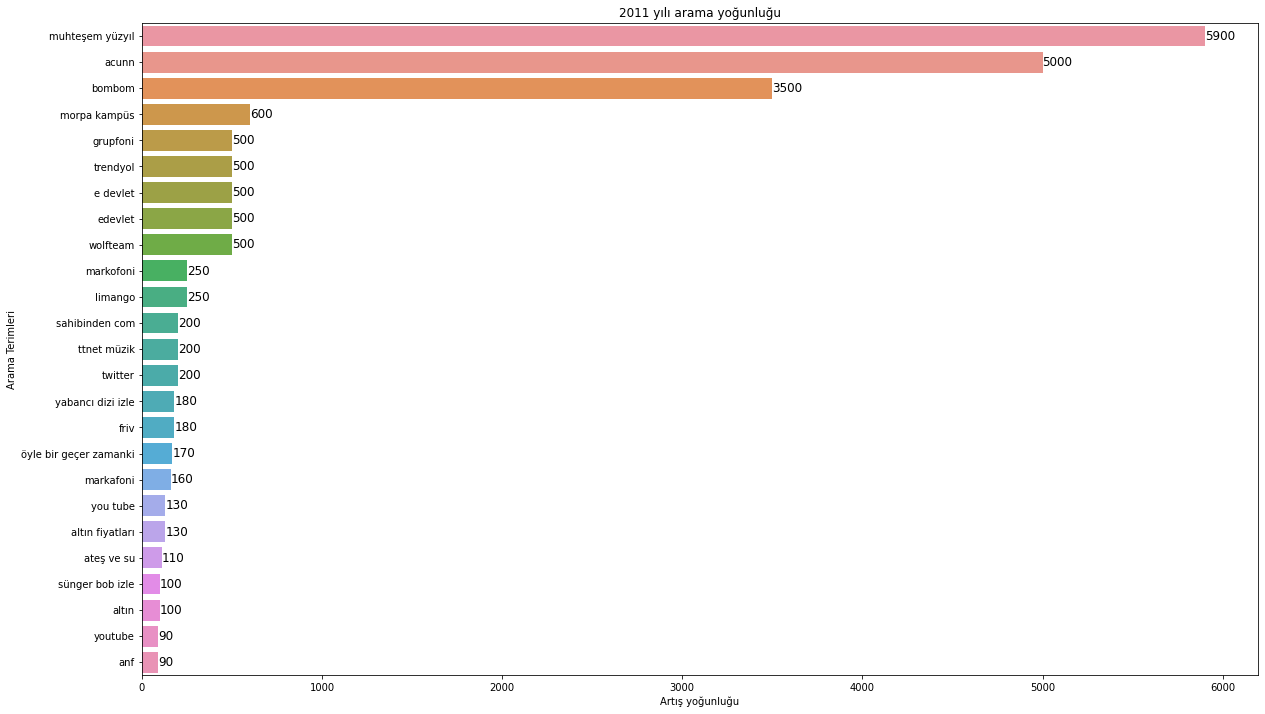

In [168]:
fig, ax = plt.subplots(figsize=(20,12))
sns.barplot(data=df_rise_q[["query_2011", "value_2011"]], y="query_2011", x="value_2011")
ax.set_xlabel("Artış yoğunluğu")
ax.set_ylabel("Arama Terimleri")
ax.set_title("2011 yılı arama yoğunluğu")
ax.bar_label(ax.containers[0], color="black", size=12);

In [192]:
type_query = df_rise_q.filter(regex="query")

In [193]:
type_query

,query_2011,query_2012,query_2013,query_2014,query_2015,query_2016,query_2017,query_2018,query_2019,query_2020,query_2021,query_2022
0,muhteşem yüzyıl,ask.fm,güneşi beklerken,kiraz mevsimi,kiralık aşk,letgo,puhu tv,sen anlat karadeniz,mucize doktor,sokağa çıkma yasağı,dizipal,brent petrol
1,acunn,gangnam style,halk tv,kardeş payı,agar io,bir garip aşk,isimsizler,e devlet soy ağacı,ekrem imamoğlu,koronavirüs,_shopping,disney plus
2,bombom,hahasport,bicaps,kaçak gelinler,agario,kısmetse olur,milli piyango 2017,çukur son bölüm,kandilli rasathanesi,yarınki hava durumu,dogecoin,öba
3,morpa kampüs,yandex,legend online,arkadaşım hoşgeldin,agarz,edevlet giriş,gece gölgenin rahatına bak,facebook hoşgeldin,benz,coronavirus,exxen,dünya kupası
4,grupfoni,tubidy,outlook,recep ivedik 4,facebook giriş yap,kismetse olur,içerde son bölüm,dünya kupası,son depremler,corona belirtileri,binance,hektaş hisse
5,trendyol,youtube mp3,amk,onedio,fuat avni,iphone 7,instagram giriş,youtube mp3 donustusturucu,netflix,fahrettin koca,selçukspor,iphone 13 pro max
6,e devlet,vip dükkan,sözcü,ysk,hızlı ve öfkeli 7,garanti internet bankacılığı,son depremler,ceyrek altin ne kadar,seçim sonuçları,hes kodu alma,sedat peker,trt1 canlı
7,edevlet,dizimag,kliksa,irem derici,dizibox,hint dizileri,garanti internet bankacılığı,çukur,beinsport,zoom,coinmarketcap,obilet
8,wolfteam,kim milyoner olmak ister,tozlu giyim,dailymotion,niloya,android oyun club,netspor,seçim sonuçları,e nabız,savefrom.net,paribu,sasa hisse
9,markofoni,arsız bela,youtube dönüştürücü,izlesene,eba,facebook giris,edevlet giriş,dolar kuru,süperlig,eba giriş,bitcoin kaç dolar,dolar/tl


In [234]:
pd.set_option('display.max_columns', 1000) 

In [235]:
type_query["query_2011"].map(lambda x: trends.suggestions(x))

0     [{'mid': '/m/0g581c_', 'title': 'Muhteşem Yüzy...
1     [{'mid': '/g/11fx8yywjy', 'title': 'Acunn.com'...
2     [{'mid': '/g/15dpv4g7', 'title': 'Bombom', 'ty...
3     [{'mid': '/g/11hmdd3f56', 'title': 'Morpa Kamp...
4     [{'mid': '/g/11g4lkgrq3', 'title': 'Grupfoni',...
5     [{'mid': '/g/11bwy_2wc_', 'title': 'Trendyol',...
6     [{'mid': '/g/11bt_n_myt', 'title': 'e-Devlet',...
7                                                    []
8     [{'mid': '/g/1215chzy', 'title': 'Wolfteam', '...
9                                                    []
10    [{'mid': '/g/11bytwbvsl', 'title': 'Limango', ...
11    [{'mid': '/m/03hhvh8', 'title': 'sahibinden.co...
12    [{'mid': '/g/1235wl6d', 'title': 'Muud', 'type...
13    [{'mid': '/m/0hn1vcg', 'title': 'Twitter', 'ty...
14    [{'mid': '/g/11ny1n3759', 'title': 'Squid Game...
15    [{'mid': '/g/11f08_hbzg', 'title': 'Friv', 'ty...
16                                                   []
17                                              

In [1]:
type_query["query_2011"].map(find_type)

NameError: name 'type_query' is not defined

In [190]:
trends.suggestions("acun")[0]["type"]

'Televizyon sunucusu'

In [177]:
trends.interest_by_region().sort_values(by=" ")

KeyError: 'request'

In [205]:
trends.trending_searches(pn="turkey")

,0
0,PSG
1,Anadolu Üniversitesi
2,Di Maria
3,ASTOR halka arz sonuçları
4,Şule Yüksel Şenler
5,Ahmet Davutoğlu
6,Opel Astra
7,Porto
8,Pınar Deniz
9,PSV


In [199]:
trends.interest_by_region().sort_values(by="")

,
geoName,
Yozgat,24
Kilis,26
Erzurum,28
Kars,28
Siirt,29
...,...
Kırklareli,76
Karaman,76
İzmir,83


In [153]:
trends.suggestions("GÜNEŞİ BEKLERKEN")


[{'mid': '/g/12hhhd5s6', 'title': 'Güneşi Beklerken', 'type': 'Dizi'},
 {'mid': '/m/0q5sfs7', 'title': 'Güneşi Beklerken', 'type': 'Müzik albümü'}]

In [159]:
kw_list = ["pizza"]

In [157]:
trends.categories()


{'children': [{'children': [{'name': 'Açık Artırmalar', 'id': 292},
    {'name': 'Alışveriş Portalları ve Arama Motorları', 'id': 531},
    {'name': 'Antikalar ve Koleksiyon', 'id': 64},
    {'name': 'Bilet Satışları', 'id': 614},
    {'children': [{'name': 'CD ve Müzik Alışverişi', 'id': 217},
      {'children': [{'name': 'DVD ve Video Kiralama', 'id': 1145}],
       'name': 'DVD ve Video Alışverişi',
       'id': 210},
      {'children': [{'name': 'DVD ve Video Kiralama', 'id': 1145}],
       'name': "Kiralık Eğlence CD'leri & DVD'leri & Oyunları",
       'id': 1144},
      {'name': 'Kitapçılar', 'id': 355},
      {'name': 'Video Oyunu Satıcıları', 'id': 1146}],
     'name': 'Eğlence Ürünleri',
     'id': 1143},
    {'children': [{'name': 'Stok Fotoğrafçılığı', 'id': 574}],
     'name': 'Fotoğraf ve Video Hizmetleri',
     'id': 576},
    {'children': [{'name': 'Ayakkabılar', 'id': 697},
      {'name': 'Başa takılan ürünler', 'id': 991},
      {'name': 'Ceketler', 'id': 993},
      {

In [151]:
trends.interest_by_region()

,GÜNEŞİ BEKLERKEN
geoName,
Adana,0
Adıyaman,0
Afyonkarahisar,0
Aksaray,0
Amasya,0
...,...
Çorum,0
İstanbul,0
İzmir,0


In [124]:
trends.build_payload(kw_list=["e-okul", "Machine Learning", "yapay zeka"], timeframe='2018-12-14 2022-01-25')
data = trends.interest_by_region()
data = data.sort_values(by="yapay zeka", ascending=False)

In [130]:
trends.build_payload(kw_list=["porno"], timeframe='2018-12-14 2022-01-25')
data = trends.interest_by_region()
data = data.sort_values(by="porno", ascending=False)

In [131]:
data

,porno
geoName,
Şırnak,100
Şanlıurfa,96
Iğdır,96
Ağrı,92
Diyarbakır,91
...,...
Yalova,48
Isparta,48
İstanbul,48


In [133]:
import seaborn as sns

<AxesSubplot:xlabel='porno', ylabel='geoName'>

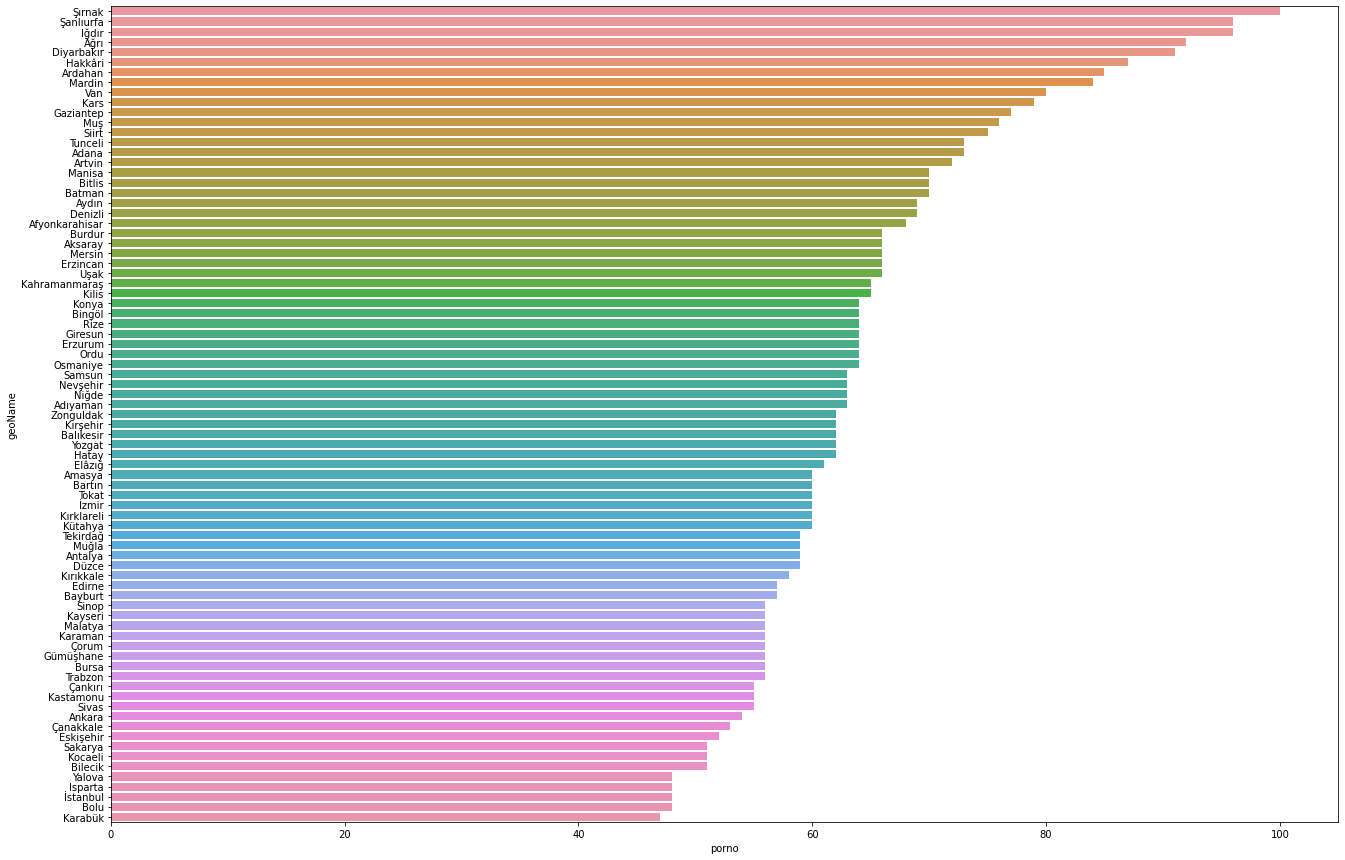

In [137]:
plt.figure(figsize=(22,15))
sns.barplot(data=data, x="porno", y=data.index)